In [ ]:
s!pip install selenium
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
#headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')

chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 3.3 MB/s 
     |████████████████████████████████| 140 kB 19.1 MB/s 
     |████████████████████████████████| 358 kB 28.3 MB/s 
     |████████████████████████████████| 58 kB 3.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


TASK-A

In [ ]:
wd = webdriver.Chrome('C:/Users/HP/Downloads/chromedriver_win32/chromedriver',options=chrome_options)
childWd = webdriver.Chrome('C:/Users/HP/Downloads/chromedriver_win32/chromedriver',options=chrome_options)
mainUrl = "https://www.beeradvocate.com/beer/{}/"


C:\Users\HP\AppData\Local\Temp\ipykernel_11100\1941674023.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('C:/Users/HP/Downloads/chromedriver_win32/chromedriver',options=chrome_options)
C:\Users\HP\AppData\Local\Temp\ipykernel_11100\1941674023.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  childWd = webdriver.Chrome('C:/Users/HP/Downloads/chromedriver_win32/chromedriver',options=chrome_options)


In [ ]:
def crawler(category):
    pageDf = pd.DataFrame(columns=['product_name','product_review','user_rating'])
    wd.get(mainUrl.format(category))
    tableElement = wd.find_element(by=By.XPATH,value='//*[@id="ba-content"]/table/tbody')
    rowElements = tableElement.find_elements(by=By.TAG_NAME,value='tr')
    print("Scraping comments for url {}".format(mainUrl.format(category)))
    
#Actual table rows start from 2nd row
    for index,row in enumerate(rowElements[1:]):
        print("Scraping Table row : {}".format(index))
        link = row.find_element(by=By.TAG_NAME,value='a')
        linkUrl = link.get_attribute('href')
        childWd.get(linkUrl)
        el = childWd.find_element(by=By.XPATH,value='//*[@id="rating_fullview"]')
        comments = el.find_elements(by=By.CLASS_NAME,value='user-comment')
        for comment in comments:
            reviewContent = comment.find_element(by=By.CLASS_NAME,value='muted')
            if(reviewContent.text.startswith('Reviewed')):
                userRating = float(comment.find_element(by=By.CLASS_NAME,value='BAscore_norm').text)
                commentTags = comment.find_elements(by=By.TAG_NAME,value='div')
                userComment = commentTags[len(commentTags)-1].text
                pageDf.loc[len(pageDf.index)] = [link.text,userComment,userRating]
    return pageDf

In [ ]:
topRatedDf

,product_name,product_review,user_rating
0,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,5.00
1,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,3.79
2,Kentucky Brunch Brand Stout,"2021 vintage, bottle #79\n\nHoly. Fucking. Shi...",4.64
3,Kentucky Brunch Brand Stout,"Celebrating my buddy @Rug with his 1,000th bee...",4.27
4,Kentucky Brunch Brand Stout,"Thick and syrupy pour, mocha head. Aroma is bo...",4.79
...,...,...,...
1775,Expedition Stout - Bourbon Barrel-Aged,"Pours a thick oily black, vigorous pours doesn...",4.49
1776,Expedition Stout - Bourbon Barrel-Aged,2021-11-27\n12oz bottle served in a pair of Ge...,4.18
1777,Expedition Stout - Bourbon Barrel-Aged,2018 Vintage\n12oz bottle poured into a tulip\...,4.57
1778,Expedition Stout - Bourbon Barrel-Aged,Annual beer grab and generally availed in the ...,4.43


In [ ]:
topNewDf = pd.read_csv('./BeerCommentsUpdated.csv')

mergeDf = pd.concat([topRatedDf,topNewDf])
mergeDf

,product_name,product_review,user_rating
0,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,5.00
1,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,3.79
2,Kentucky Brunch Brand Stout,"2021 vintage, bottle #79\n\nHoly. Fucking. Shi...",4.64
3,Kentucky Brunch Brand Stout,"Celebrating my buddy @Rug with his 1,000th bee...",4.27
4,Kentucky Brunch Brand Stout,"Thick and syrupy pour, mocha head. Aroma is bo...",4.79
...,...,...,...
1512,Oasis,"Pours hazy, gold in color with one inch head. ...",4.00
1513,Rakau Drip,"1st Review.\ns) Crazy perfume, herbal from the...",4.18
1514,Rakau Drip,Pours a very hazy light gold. Aromas and taste...,4.55
1515,Blender Green,16 ounce can in a stemmed tulip IPA glass. Can...,4.18


In [ ]:
mergeDf.to_csv('NewAndTopRated.csv',index=False)

In [ ]:
trendingDf = crawler('trending')

Scraping comments for url https://www.beeradvocate.com/beer/trending/
Scraping Table row : 0
Scraping Table row : 1
Scraping Table row : 2
Scraping Table row : 3
Scraping Table row : 4
Scraping Table row : 5
Scraping Table row : 6
Scraping Table row : 7
Scraping Table row : 8
Scraping Table row : 9
Scraping Table row : 10
Scraping Table row : 11
Scraping Table row : 12
Scraping Table row : 13
Scraping Table row : 14
Scraping Table row : 15
Scraping Table row : 16
Scraping Table row : 17
Scraping Table row : 18
Scraping Table row : 19
Scraping Table row : 20
Scraping Table row : 21
Scraping Table row : 22
Scraping Table row : 23
Scraping Table row : 24
Scraping Table row : 25
Scraping Table row : 26
Scraping Table row : 27
Scraping Table row : 28
Scraping Table row : 29
Scraping Table row : 30
Scraping Table row : 31
Scraping Table row : 32
Scraping Table row : 33
Scraping Table row : 34
Scraping Table row : 35
Scraping Table row : 36
Scraping Table row : 37
Scraping Table row : 38
Scra

In [ ]:
len(trendingDf)

1364

In [ ]:
mergeDfTrending = pd.concat([mergeDf,trendingDf])
mergeDfTrending.drop_duplicates()

,product_name,product_review,user_rating
0,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,5.00
1,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,3.79
2,Kentucky Brunch Brand Stout,"2021 vintage, bottle #79\n\nHoly. Fucking. Shi...",4.64
3,Kentucky Brunch Brand Stout,"Celebrating my buddy @Rug with his 1,000th bee...",4.27
4,Kentucky Brunch Brand Stout,"Thick and syrupy pour, mocha head. Aroma is bo...",4.79
...,...,...,...
1359,Bottle Shop Series #2: Highball Drifter,Pours a clear brown with a ruby tint. Thin off...,4.51
1360,Bottle Shop Series #2: Highball Drifter,A moderate pour into a pint glass yielded a fi...,4.44
1361,Bottle Shop Series #2: Highball Drifter,"12 oz bottle, born on 7/7/21, poured into a Fo...",4.50
1362,Bottle Shop Series #2: Highball Drifter,From the growler in a snifter via Country Fres...,4.21


In [ ]:
topNewDf = crawler('top-new')

Scraping comments for url https://www.beeradvocate.com/beer/top-new/
Scraping Table row : 0
Scraping Table row : 1
Scraping Table row : 2
Scraping Table row : 3
Scraping Table row : 4
Scraping Table row : 5
Scraping Table row : 6
Scraping Table row : 7
Scraping Table row : 8
Scraping Table row : 9
Scraping Table row : 10
Scraping Table row : 11
Scraping Table row : 12
Scraping Table row : 13
Scraping Table row : 14
Scraping Table row : 15
Scraping Table row : 16
Scraping Table row : 17
Scraping Table row : 18
Scraping Table row : 19
Scraping Table row : 20
Scraping Table row : 21
Scraping Table row : 22
Scraping Table row : 23
Scraping Table row : 24
Scraping Table row : 25
Scraping Table row : 26
Scraping Table row : 27
Scraping Table row : 28
Scraping Table row : 29
Scraping Table row : 30
Scraping Table row : 31
Scraping Table row : 32
Scraping Table row : 33
Scraping Table row : 34
Scraping Table row : 35
Scraping Table row : 36
Scraping Table row : 37
Scraping Table row : 38
Scrap

In [ ]:
popularDf = crawler('popular')

Scraping comments for url https://www.beeradvocate.com/beer/popular/
Scraping Table row : 0
Scraping Table row : 1
Scraping Table row : 2
Scraping Table row : 3
Scraping Table row : 4
Scraping Table row : 5
Scraping Table row : 6
Scraping Table row : 7
Scraping Table row : 8
Scraping Table row : 9
Scraping Table row : 10
Scraping Table row : 11
Scraping Table row : 12
Scraping Table row : 13
Scraping Table row : 14
Scraping Table row : 15
Scraping Table row : 16
Scraping Table row : 17
Scraping Table row : 18
Scraping Table row : 19
Scraping Table row : 20
Scraping Table row : 21
Scraping Table row : 22
Scraping Table row : 23
Scraping Table row : 24
Scraping Table row : 25
Scraping Table row : 26
Scraping Table row : 27
Scraping Table row : 28
Scraping Table row : 29
Scraping Table row : 30
Scraping Table row : 31
Scraping Table row : 32
Scraping Table row : 33
Scraping Table row : 34
Scraping Table row : 35
Scraping Table row : 36
Scraping Table row : 37
Scraping Table row : 38
Scrap

In [ ]:
len(popularDf)
mergeDfPopular = pd.concat([mergeDfTrending,popularDf])
mergeDfPopular.drop_duplicates()

,product_name,product_review,user_rating
0,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,5.00
1,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,3.79
2,Kentucky Brunch Brand Stout,"2021 vintage, bottle #79\n\nHoly. Fucking. Shi...",4.64
3,Kentucky Brunch Brand Stout,"Celebrating my buddy @Rug with his 1,000th bee...",4.27
4,Kentucky Brunch Brand Stout,"Thick and syrupy pour, mocha head. Aroma is bo...",4.79
...,...,...,...
3071,Shakespeare Oatmeal Stout,Poured from a bottle into a stout glass.\n\nPo...,4.25
3072,Shakespeare Oatmeal Stout,"From old, undated notes. Poured from the bottl...",4.09
3073,Shakespeare Oatmeal Stout,"If you like dry oatmeal stouts, you'll like th...",3.88
3074,Shakespeare Oatmeal Stout,"(12 oz bottle, 19559... poured into a nonic)\n...",4.36


In [ ]:
mergeFinal = pd.concat([topRatedDf,popularDf,trendingDf])
mergeFinal.drop_duplicates().to_csv('FinalData.csv',index=False)

In [ ]:
mergeFinal = mergeFinal.drop_duplicates()
mergeFinal

,product_name,product_review,user_rating
0,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,5.00
1,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,3.79
2,Kentucky Brunch Brand Stout,"2021 vintage, bottle #79\n\nHoly. Fucking. Shi...",4.64
3,Kentucky Brunch Brand Stout,"Celebrating my buddy @Rug with his 1,000th bee...",4.27
4,Kentucky Brunch Brand Stout,"Thick and syrupy pour, mocha head. Aroma is bo...",4.79
...,...,...,...
1359,Bottle Shop Series #2: Highball Drifter,Pours a clear brown with a ruby tint. Thin off...,4.51
1360,Bottle Shop Series #2: Highball Drifter,A moderate pour into a pint glass yielded a fi...,4.44
1361,Bottle Shop Series #2: Highball Drifter,"12 oz bottle, born on 7/7/21, poured into a Fo...",4.50
1362,Bottle Shop Series #2: Highball Drifter,From the growler in a snifter via Country Fres...,4.21


### TASK-B

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

import pandas as pd
mergeFinal = pd.read_csv('/content/gdrive/MyDrive/Unstructured Data/Assignment-2/ScraperData.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import re

#Removing special character
mergeFinal['product_review'] = mergeFinal.apply(lambda x: re.sub("([!\"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@#']+)",'',x['product_review']),axis=1)
#Removing extra lines
mergeFinal['product_review'] = mergeFinal.apply(lambda x: x['product_review'].replace('\n',' '),axis=1)
#Removing additional spaces and converting to lower case
mergeFinal['product_review'] = mergeFinal.apply(lambda x: re.sub("\\s+",' ',x['product_review'].strip().lower()),axis=1)

mergeFinal

,product_name,product_review,user_rating
0,Kentucky Brunch Brand Stout,i didnt think i was going to give it a perfect...,5.00
1,Kentucky Brunch Brand Stout,so i just read a review that called the legend...,3.79
2,Kentucky Brunch Brand Stout,2021 vintage bottle 79 holy fucking shit kbbs ...,4.64
3,Kentucky Brunch Brand Stout,celebrating my buddy rug with his 1000th beer ...,4.27
4,Kentucky Brunch Brand Stout,thick and syrupy pour mocha head aroma is booz...,4.79
...,...,...,...
5721,Bottle Shop Series #2: Highball Drifter,pours a clear brown with a ruby tint thin offw...,4.51
5722,Bottle Shop Series #2: Highball Drifter,a moderate pour into a pint glass yielded a fi...,4.44
5723,Bottle Shop Series #2: Highball Drifter,12 oz bottle born on 7721 poured into a founde...,4.50
5724,Bottle Shop Series #2: Highball Drifter,from the growler in a snifter via country fres...,4.21


In [ ]:
#Tokenize word
import nltk
nltk.download('punkt')
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from collections import Counter
from scipy.stats import zipf
mergeFinal['Word List'] = mergeFinal.apply(lambda x: word_tokenize(x['product_review']),axis=1)
mergeFinal

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,product_name,product_review,user_rating,Word List
0,Kentucky Brunch Brand Stout,i didnt think i was going to give it a perfect...,5.00,"[i, didnt, think, i, was, going, to, give, it,..."
1,Kentucky Brunch Brand Stout,so i just read a review that called the legend...,3.79,"[so, i, just, read, a, review, that, called, t..."
2,Kentucky Brunch Brand Stout,2021 vintage bottle 79 holy fucking shit kbbs ...,4.64,"[2021, vintage, bottle, 79, holy, fucking, shi..."
3,Kentucky Brunch Brand Stout,celebrating my buddy rug with his 1000th beer ...,4.27,"[celebrating, my, buddy, rug, with, his, 1000t..."
4,Kentucky Brunch Brand Stout,thick and syrupy pour mocha head aroma is booz...,4.79,"[thick, and, syrupy, pour, mocha, head, aroma,..."
...,...,...,...,...
5721,Bottle Shop Series #2: Highball Drifter,pours a clear brown with a ruby tint thin offw...,4.51,"[pours, a, clear, brown, with, a, ruby, tint, ..."
5722,Bottle Shop Series #2: Highball Drifter,a moderate pour into a pint glass yielded a fi...,4.44,"[a, moderate, pour, into, a, pint, glass, yiel..."
5723,Bottle Shop Series #2: Highball Drifter,12 oz bottle born on 7721 poured into a founde...,4.50,"[12, oz, bottle, born, on, 7721, poured, into,..."
5724,Bottle Shop Series #2: Highball Drifter,from the growler in a snifter via country fres...,4.21,"[from, the, growler, in, a, snifter, via, coun..."


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
stopwords

mergeFinal['Word List'] = mergeFinal['Word List'].apply(lambda x: [item for item in x if item not in stopwords])
lemmatizer = WordNetLemmatizer()
#Get root form of the word
mergeFinal['Word List'] = mergeFinal['Word List'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
mergeFinal

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,product_name,product_review,user_rating,Word List
0,Kentucky Brunch Brand Stout,i didnt think i was going to give it a perfect...,5.00,"[didnt, think, going, give, perfect, score, lo..."
1,Kentucky Brunch Brand Stout,so i just read a review that called the legend...,3.79,"[read, review, called, legendary, kbbs, “, typ..."
2,Kentucky Brunch Brand Stout,2021 vintage bottle 79 holy fucking shit kbbs ...,4.64,"[2021, vintage, bottle, 79, holy, fucking, shi..."
3,Kentucky Brunch Brand Stout,celebrating my buddy rug with his 1000th beer ...,4.27,"[celebrating, buddy, rug, 1000th, beer, review..."
4,Kentucky Brunch Brand Stout,thick and syrupy pour mocha head aroma is booz...,4.79,"[thick, syrupy, pour, mocha, head, aroma, booz..."
...,...,...,...,...
5721,Bottle Shop Series #2: Highball Drifter,pours a clear brown with a ruby tint thin offw...,4.51,"[pours, clear, brown, ruby, tint, thin, offwhi..."
5722,Bottle Shop Series #2: Highball Drifter,a moderate pour into a pint glass yielded a fi...,4.44,"[moderate, pour, pint, glass, yielded, fine, o..."
5723,Bottle Shop Series #2: Highball Drifter,12 oz bottle born on 7721 poured into a founde...,4.50,"[12, oz, bottle, born, 7721, poured, founder, ..."
5724,Bottle Shop Series #2: Highball Drifter,from the growler in a snifter via country fres...,4.21,"[growler, snifter, via, country, fresh, market..."


In [ ]:
allWords = mergeFinal['Word List'].sum()
wordDist = nltk.FreqDist(allWords)
wordDist

FreqDist({'beer': 5387, 'head': 4169, 'taste': 3849, 'malt': 3286, 'hop': 2743, 'flavor': 2609, 'light': 2507, 'aroma': 2483, 'good': 2412, 'note': 2362, ...})

In [ ]:
WordDf = pd.DataFrame(data=wordDist.items(),columns=['Word','Frequency'])
WordDf.sort_values(by='Frequency',ascending=False)

,Word,Frequency
98,beer,5387
243,head,4169
8,taste,3849
443,malt,3286
528,hop,2743
...,...,...
10085,11322,1
10087,sfloral,1
10088,tgrapefruit,1
10089,alltimer,1


In [ ]:
attributes = ['taste','smell','froth','fruity','hoppy','malty','robust','clarity','aggressive',"flavor", "sweet", "note", "fruit", "aroma", "light", "malt",
              "hop", "carbonation", "smooth", "thick", "mouthfeel", "bitterness"]

In [ ]:
#Frequent distributions

top_10Df = WordDf[WordDf['Word'].apply(lambda x: x in attributes)].sort_values(by='Frequency',ascending=False)[:10]
top_10Df

,Word,Frequency
8,taste,3849
443,malt,3286
528,hop,2743
164,flavor,2609
257,light,2507
108,aroma,2483
281,note,2362
745,sweet,2194
179,carbonation,2046
7,smell,1849


Text(0.5, 1.0, 'Frequency Distribution of Beer Attributes')

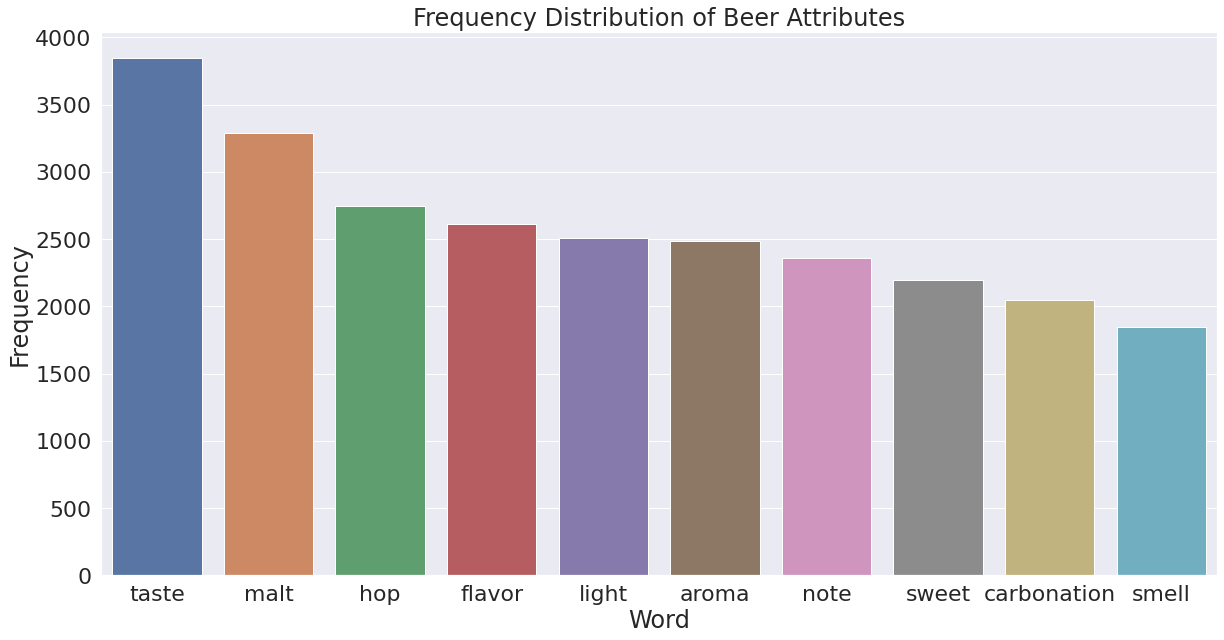

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=2)
plt.figure(figsize=(20,10))
sns.barplot(x='Word',y='Frequency',data=top_10Df)
plt.title('Frequency Distribution of Beer Attributes')

## TASK-C

In [ ]:
#mergeFinal.to_csv('/content/gdrive/MyDrive/Unstructured Data/Assignment-2/BeerWords.csv',index=False)
#mergeFinal = pd.read_csv('/content/gdrive/MyDrive/Unstructured Data/Assignment-2/BeerWords.csv')
mergeFinal

,product_name,product_review,user_rating,Word List
0,Kentucky Brunch Brand Stout,i didnt think i was going to give it a perfect...,5.00,"[didnt, think, going, give, perfect, score, lo..."
1,Kentucky Brunch Brand Stout,so i just read a review that called the legend...,3.79,"[read, review, called, legendary, kbbs, “, typ..."
2,Kentucky Brunch Brand Stout,2021 vintage bottle 79 holy fucking shit kbbs ...,4.64,"[2021, vintage, bottle, 79, holy, fucking, shi..."
3,Kentucky Brunch Brand Stout,celebrating my buddy rug with his 1000th beer ...,4.27,"[celebrating, buddy, rug, 1000th, beer, review..."
4,Kentucky Brunch Brand Stout,thick and syrupy pour mocha head aroma is booz...,4.79,"[thick, syrupy, pour, mocha, head, aroma, booz..."
...,...,...,...,...
5721,Bottle Shop Series #2: Highball Drifter,pours a clear brown with a ruby tint thin offw...,4.51,"[pours, clear, brown, ruby, tint, thin, offwhi..."
5722,Bottle Shop Series #2: Highball Drifter,a moderate pour into a pint glass yielded a fi...,4.44,"[moderate, pour, pint, glass, yielded, fine, o..."
5723,Bottle Shop Series #2: Highball Drifter,12 oz bottle born on 7721 poured into a founde...,4.50,"[12, oz, bottle, born, 7721, poured, founder, ..."
5724,Bottle Shop Series #2: Highball Drifter,from the growler in a snifter via country fres...,4.21,"[growler, snifter, via, country, fresh, market..."


In [ ]:
productList = pd.read_csv('/content/gdrive/MyDrive/Unstructured Data/Assignment-2/attributes.txt').columns.values
productList

array(['taste', 'malt', 'hop'], dtype=object)

In [ ]:
def attributeCounter(s,i):
    wordDict = Counter(s)
    return wordDict[i]

In [ ]:
def cosine(s1,s2):
    return np.dot(s1,s2)/norm(s1)*norm(s2)
mergeFinal

,product_name,product_review,user_rating,Word List
0,Kentucky Brunch Brand Stout,i didnt think i was going to give it a perfect...,5.00,"[didnt, think, going, give, perfect, score, lo..."
1,Kentucky Brunch Brand Stout,so i just read a review that called the legend...,3.79,"[read, review, called, legendary, kbbs, “, typ..."
2,Kentucky Brunch Brand Stout,2021 vintage bottle 79 holy fucking shit kbbs ...,4.64,"[2021, vintage, bottle, 79, holy, fucking, shi..."
3,Kentucky Brunch Brand Stout,celebrating my buddy rug with his 1000th beer ...,4.27,"[celebrating, buddy, rug, 1000th, beer, review..."
4,Kentucky Brunch Brand Stout,thick and syrupy pour mocha head aroma is booz...,4.79,"[thick, syrupy, pour, mocha, head, aroma, booz..."
...,...,...,...,...
5721,Bottle Shop Series #2: Highball Drifter,pours a clear brown with a ruby tint thin offw...,4.51,"[pours, clear, brown, ruby, tint, thin, offwhi..."
5722,Bottle Shop Series #2: Highball Drifter,a moderate pour into a pint glass yielded a fi...,4.44,"[moderate, pour, pint, glass, yielded, fine, o..."
5723,Bottle Shop Series #2: Highball Drifter,12 oz bottle born on 7721 poured into a founde...,4.50,"[12, oz, bottle, born, 7721, poured, founder, ..."
5724,Bottle Shop Series #2: Highball Drifter,from the growler in a snifter via country fres...,4.21,"[growler, snifter, via, country, fresh, market..."


In [ ]:
from numpy.linalg import norm
from math import log
import numpy as np
def cosineSimilarity(attribute_list,beerDf):
    for i in attribute_list:
        beerDf[i] = beerDf['Word List'].apply(lambda x: attributeCounter(x,i))
    attribute_idf_vector = [1,1,1]
    beerDf.loc[:,4:] = beerDf.iloc[:,4:]*attribute_idf_vector
    for index,i in enumerate(beerDf.columns.values[4:]):
        attribute_idf_vector[index] = log(len(beerDf)/len(beerDf[beerDf[i]!=0]),10)
    beerDf.iloc[:,4:] = beerDf.iloc[:,4:]*attribute_idf_vector
    beerDf['Similarity Score'] = beerDf.iloc[:,4:].apply(lambda x: cosine(x,attribute_idf_vector),axis=1)
    beerDf[['product_name','product_review','Similarity Score']].to_csv('/content/gdrive/MyDrive/Unstructured Data/Assignment-2/Cosine Similarity.csv',index=False)
    return beerDf

In [ ]:
beerDf = cosineSimilarity(productList,mergeFinal)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [ ]:
beerDf

,product_name,product_review,user_rating,Word List,taste,malt,hop,Similarity Score
0,Kentucky Brunch Brand Stout,i didnt think i was going to give it a perfect...,5.00,"[didnt, think, going, give, perfect, score, lo...",0.542842,0.0,0.0,0.203281
1,Kentucky Brunch Brand Stout,so i just read a review that called the legend...,3.79,"[read, review, called, legendary, kbbs, “, typ...",0.000000,0.0,0.0,NaN
2,Kentucky Brunch Brand Stout,2021 vintage bottle 79 holy fucking shit kbbs ...,4.64,"[2021, vintage, bottle, 79, holy, fucking, shi...",0.271421,0.0,0.0,0.203281
3,Kentucky Brunch Brand Stout,celebrating my buddy rug with his 1000th beer ...,4.27,"[celebrating, buddy, rug, 1000th, beer, review...",0.000000,0.0,0.0,NaN
4,Kentucky Brunch Brand Stout,thick and syrupy pour mocha head aroma is booz...,4.79,"[thick, syrupy, pour, mocha, head, aroma, booz...",0.000000,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
5721,Bottle Shop Series #2: Highball Drifter,pours a clear brown with a ruby tint thin offw...,4.51,"[pours, clear, brown, ruby, tint, thin, offwhi...",0.000000,0.0,0.0,NaN
5722,Bottle Shop Series #2: Highball Drifter,a moderate pour into a pint glass yielded a fi...,4.44,"[moderate, pour, pint, glass, yielded, fine, o...",0.542842,0.0,0.0,0.203281
5723,Bottle Shop Series #2: Highball Drifter,12 oz bottle born on 7721 poured into a founde...,4.50,"[12, oz, bottle, born, 7721, poured, founder, ...",0.000000,0.0,0.0,NaN
5724,Bottle Shop Series #2: Highball Drifter,from the growler in a snifter via country fres...,4.21,"[growler, snifter, via, country, fresh, market...",0.000000,0.0,0.0,NaN


In [ ]:
#beerDf[~beerDf['Similarity Score'].isna()]
beerDf['Similarity Score'] = beerDf['Similarity Score'].fillna(0)
beerDf

,product_name,product_review,user_rating,Word List,taste,malt,hop,Similarity Score
0,Kentucky Brunch Brand Stout,i didnt think i was going to give it a perfect...,5.00,"[didnt, think, going, give, perfect, score, lo...",0.542842,0.0,0.0,0.203281
1,Kentucky Brunch Brand Stout,so i just read a review that called the legend...,3.79,"[read, review, called, legendary, kbbs, “, typ...",0.000000,0.0,0.0,0.000000
2,Kentucky Brunch Brand Stout,2021 vintage bottle 79 holy fucking shit kbbs ...,4.64,"[2021, vintage, bottle, 79, holy, fucking, shi...",0.271421,0.0,0.0,0.203281
3,Kentucky Brunch Brand Stout,celebrating my buddy rug with his 1000th beer ...,4.27,"[celebrating, buddy, rug, 1000th, beer, review...",0.000000,0.0,0.0,0.000000
4,Kentucky Brunch Brand Stout,thick and syrupy pour mocha head aroma is booz...,4.79,"[thick, syrupy, pour, mocha, head, aroma, booz...",0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
5721,Bottle Shop Series #2: Highball Drifter,pours a clear brown with a ruby tint thin offw...,4.51,"[pours, clear, brown, ruby, tint, thin, offwhi...",0.000000,0.0,0.0,0.000000
5722,Bottle Shop Series #2: Highball Drifter,a moderate pour into a pint glass yielded a fi...,4.44,"[moderate, pour, pint, glass, yielded, fine, o...",0.542842,0.0,0.0,0.203281
5723,Bottle Shop Series #2: Highball Drifter,12 oz bottle born on 7721 poured into a founde...,4.50,"[12, oz, bottle, born, 7721, poured, founder, ...",0.000000,0.0,0.0,0.000000
5724,Bottle Shop Series #2: Highball Drifter,from the growler in a snifter via country fres...,4.21,"[growler, snifter, via, country, fresh, market...",0.000000,0.0,0.0,0.000000


## TASK-D

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 3.9 MB/s 
     |████████████████████████████████| 127 kB 42.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.4.3 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.


In [ ]:
from vaderSentiment.vaderSentiment  import  SentimentIntensityAnalyzer

def vaderScore(sentence):
    sdr = SentimentIntensityAnalyzer()
    sentiment_dict = sdr.polarity_scores(' '.join(sentence))
    
    if(sentiment_dict['compound']>=0.5):
        return 'Positive',sentiment_dict['compound']
    elif(sentiment_dict['compound']<=-0.05):
        return 'Negative',sentiment_dict['compound']
    else:
        return 'Neutral',sentiment_dict['compound']
    print(sentiment_dict)
    

In [ ]:
beerDf['Vader Score'] = beerDf['Word List'].apply(lambda x: vaderScore(x))

In [ ]:
beerDf['Sentiment'],beerDf['Compound Score'] = zip(*beerDf['Vader Score'])

In [ ]:
beerDf['Sentiment'].value_counts()

Positive    4947
Neutral      547
Negative     232
Name: Sentiment, dtype: int64

## TASK-E

In [ ]:
beerDf['Evaluation Score'] = beerDf[['Similarity Score','Compound Score']].mean(axis=1)
recommended = beerDf.sort_values(by='Evaluation Score')[:3]
print('Top 3 recommendations would be {}'.format(','.join(recommended['product_name'])))

Top 3 recommendations would be Corona Extra,Starry Noche,Leche Borracho


## TASK-F

In [ ]:
#!pip install -U spacy

In [ ]:
#!python -m spacy download en_core_web_md

In [ ]:
import spacy
nlp = spacy.load('en_core_web_md')
top3_attributes=['taste', 'malt', 'hop']

In [ ]:
att1 = top3_attributes[0]
att2 = top3_attributes[1]
att3 = top3_attributes[2]

def calculate_similarity(review, att):
    review_wordvec = nlp(review)
    sim_score = review_wordvec.similarity(nlp(att))
    return sim_score

beerDf['sim_score_'+att1] = beerDf['product_review'].apply(lambda x: calculate_similarity(x,att1))
beerDf['sim_score_'+att2] = beerDf['product_review'].apply(lambda x: calculate_similarity(x,att2))
beerDf['sim_score_'+att3] = beerDf['product_review'].apply(lambda x: calculate_similarity(x,att3))
beerDf.head()

In [ ]:
beerDf_spacy = beerDf.groupby('product_name')['sim_score_'+top3_attributes[0],'sim_score_'+top3_attributes[1],'sim_score_'+top3_attributes[2]].mean()
beerDf_spacy['spacy_score'] = (beerDf_spacy['sim_score_'+top3_attributes[0]] + beerDf_spacy['sim_score_'+top3_attributes[1]] + beerDf_spacy['sim_score_'+top3_attributes[2]])/3  
beerDf_spacy = beerDf_spacy.sort_values(by = 'spacy_score', ascending=False)

beerDf_spacy.head(3)

In [ ]:
print(f"The Top 3 recommendations based on Word Vectors similarity scores are: \n1.{beerDf_spacy.index[0]}\n2.{beerDf_spacy.index[1]} \n3.{beerDf_spacy.index[2]}")

**Comparing Recommendations from Bag of Words and Word Vectors:**

The recommendations from Word Vectors using spacy package are very different from the one using bag-of words cosine similarity. The *word vectors* suggest that for the top 3 attributes : **taste**, **malt** and **hop**, the best recommendations for the consumer is **Smooth**, **Fou' Foune** and **Pressed - Stroopwafel** in the same order. Although, *Bag of words* suggested that the best beers on these attributes are **Corona Extra,Starry Noche** and **Leche Borracho.**

This means that for the same dataset the cosine similarity can be varied in bag of words and word vectors methods.